<a href="https://colab.research.google.com/github/DHI-GRAS/CTCN-workshop-2023/blob/main/notebooks/module_1_GEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Google Earth Engine 

This notebook provides examples of how to use Google Earth Engine (GEE) to analyze geospatial raster and vector data. 


**By the end of the tutorial you will be familiar and able to interact with GEE including:**


1. Accessing GEE using your account in a notebook environment (authentication)
2. Install and import python packages
3. Visualize and interact with data on a map 
4. Explore the Data Catalog
5. Load and visualize images 
6. Create composites and mask image collections
7. Exporting images for local use

After some setup and exploration of GEE - in this introduction module - you will become more familiar working on this platform and be ready to work on analysis in the next modules such as (Module 2, Module 3 and Module 4).

# What are our first steps? 

First, we will grant this notebook access to GEE using your account (Authentication). Then import some required python libraries and play with an interactive map, which helps us to become more familiar with the environment. For example, we will show how to include basemaps and GEE datasets as tile layers in the interactive map and also test some map functionalities. Finally, we will see how to get different satellite collections for a region of interest and export the results as a cloud optimized GeoTIFF.

❓ Ask anytime if you have any question. 

☝ You do not need to understand everything on the first pass! Your goal is to run through the tutorial end-to-end and get results.

📚 More information is outlined in sections 3.2 (Google Earth Engine) and 3.3 (Google Earth Engine API) of the training material.

#  Getting started with a brief intro to Python API

Earth Engine Python API facilitates interacting with Earth Engine servers using the Python programming language. Python API allows the user to use jupyter notebook and rich sources of Python libraries, which are particularly good for training purposes. 


Prerequisites: 
* Feel free to review the [Earth Engine get started guide](https://developers.google.com/earth-engine/getstarted)
* Earth Engine Python API https://developers.google.com/earth-engine/


#  1) Authentificate GEE Python API

Let's start! We will first run the following cell to initialize the API.

The output will contain instructions on how to grant this notebook access to Earth Engine using your account.

We are using Google Colab, the latest version of the Earth Engine Python client library (import ee) has already been installed.

In [ ]:
!pip install -q earthengine-api

# Import the Earth Engine library.
import ee

# Trigger the authentication flow.
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=IWmBVJi28k357T1IoUNb9uYuvQMdR6SlJOxfpOWRy74&tc=iclLe96IE_qqBI4HpLsXCAVrqQWX4gS4O2U_535_Kog&cc=2mgggkkREmbepXH_7M7uXu05vw883awU9CIyKfTlM8Q

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AWgavddlUx-4ICy_7fBhlvYIwALhRwaitz0x25lf4RBFn1TIkV8ymTnVLi0

Successfully saved authorization token.


🎉 If you authenticate correctly, you should see this message in the cell above : **Successfully saved authorization token**

# 2) Import python geemap library
[Geemap](https://geemap.org/) is a Python package for interactive mapping with Google Earth Engine (GEE) . GEE Python API has relatively little documentation and limited functionality for visualizing results interactively, therefore, the geemap Python package was created to fill this gap. It is built upon ipyleaflet and ipywidgets, and enables users to analyze and visualize Earth Engine datasets interactively within a Jupyter-based environment

You can learn more:
[GitHub repo](https://github.com/giswqs/geemap), 
[YouTube](https://youtube.com/@giswqs)

Installing a Python package in Google Colab is simple using the pip command along with the % mark. The mark at the start of a cell allows to run a shell command.

In [ ]:
# Capture is used for suppressing the output.
%%capture
%pip install geemap

Now, after installing the python packages you can be able to import your module.

In [ ]:
# Import the installed geemap.
import geemap

The pprint library makes it easier to read some formated data structures

In [ ]:
# Import the ppring library.
import pprint


# 3) Working with the interactive map  

This section includes:

>A.  Creating an interactive map and adding basemaps   
>B.  Using the geemap toolbar   
>C.  Defining an Area of Interest





### A. Creating an interactive map and adding basemaps

We will create our first interactive map with one line of code, specifying the location where we want to center the map, the zoom level, and the main dimensions of the map. Executing this cell should display a map, centered on the AOI which we can find at approximately: latitude: 21 and longitude: 90. We set our map zoom factor to 7 to include the entire country in our view. The default basemap is ROADMAP map but we will add more TERRAIN and SATELLIE basemaps.



> Q: *What is a basemap?*  
A basemap is used for locational reference and provides a framework on which users overlay or mash up their operational layers, perform tasks, and visualize geographic information. You can specify the basemap when creating an interactive map. Alternatively, you can use the Map.add_basemap() function to add more basemaps to an existing map.

 

* You can click on the Toolbar    p.png  and see more functionalities. 

* You can click on image.png to change the basemaps ![image.png]

In [ ]:
# Adding an interactive map.
Map = geemap.Map(basemap='ROADMAP', center=[21, 90], zoom=7, height=500, draw = True)

# Adding the TERRAIN and SATELLITE basemaps.
Map.add_basemap("TERRAIN")
Map.add_basemap("SATELLITE")
Map

Map(center=[21, 90], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

## B.  Define the Area of Interest

We are going to use toolbox on left side for drawing your AOI   image.png

You need to click on this tool image.png and then you aready to draw a rectangle as your AOI. 

> Q: *How GEE handles vector data?*  
Earth Engine handles vector data with the Geometry type, including Point (a list of coordinates in some projection), LineString (a list of points), LinearRing (a closed LineString), and Polygon (a list of LinearRings where the first is a shell and subsequent rings are holes). 

*   To remove all user-drawn geometries:  geemap.remove_drawn_features()
*   To use the last drawn feature:  Map.draw_last_feature



In [ ]:
# Visualize the map. 
Map

Map(center=[21, 90], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

## C. Using Toolbars p.png


The toolbar makes the user interaction easier. We will try these functionalities from the toolbar:

*   You can try to change the basemap using this tool image.png from the toolbox, choose OpenStreetMap or HYBRID. Some basemaps are not fully working yet.
*  Try to draw more polygons using this tool image.png and then you can remove all drawn features by using this tool 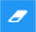



In [ ]:
# Visualize the map. 
Map

Map(bottom=14587.0, center=[21.9328547363353, 90.4669189453125], controls=(WidgetControl(options=['position', …

- Add your AOI to the map manually

In [ ]:
# Taking a draw feature from the map.
feature = Map.draw_last_feature

# If drawing does not exist then taking a polygon as the default version.
if feature is None:
    geom = ee.Geometry.Polygon([[[89.40673828125000, 21.371244370618310],
                                [90.90087890624999, 21.371244370618310],
                                [90.90087890624999, 22.471954507739227],
                                [89.40673828125000, 22.471954507739227],
                                [89.40673828125000, 21.37124437061831],]])
    feature = ee.Feature(geom, {})

# Define the AOI.
AOI = feature.geometry()

# Visualize the map.
Map.addLayer(AOI, {}, "AOI")
Map

Map(bottom=14587.0, center=[21.9328547363353, 90.4669189453125], controls=(WidgetControl(options=['position', …

# 4) Load satellite imagery, process and display them

This section includes:   
> A. Exploring Earth Engine Data Catalog  
B. Visualise the Digital elevation  model (DEM) SRTM 30m    
C. Visualise Landsat-8 surface reflectance collection and apply cloud masking   
D. Visualise Sentinel-2 surface reflectance collection and apply cloud masking   
E. Visualise Sentinel-1 backscatter collection and check metadata   

## A.  Exploring Earth Engine Data Catalog

Earth Engine's public data archive includes more than forty years of historical imagery and scientific datasets, updated and expanded daily. You can explore all datasets provided by GEE here: https://developers.google.com/earth-engine/datasets.   
The datasets have  many different types have datasets?
- Features (ee.Feature) which are geometric objects with a list of properties, e.g., roads with some properties such as name and area
- Images (ee.Image) which are raster objects and may include several bands, 
e.g., SRTM 30m.
- Collections (ee.FeatureCollection or ee.ImageCollection) which are groups of features or images




**TIP**: Try to search for 'elevation' or 'dem' or 'SRTM', you will see a result as 'SRTM Digital Elevation Data 30m' , click and read the dataset descriptions to understand the format. The ID for this DEM image is ee.Image("USGS/SRTMGL1_003")
 


## B. SRTM DEM 30m

The Shuttle Radar Topography Mission (SRTM) digital elevation data is an international research effort that obtained digital elevation models on a near-global scale. This SRTMGL1_003 product is provided by NASA JPL at a resolution of 1 arc-second (approximately 30m). 

We will load this image and find out the elevation for  Mount Everest.

In [ ]:
# Choose DEM image.
dem = ee.Image('USGS/SRTMGL1_003')

# Make a point.
xy = ee.Geometry.Point([86.9250, 27.9881])

# Find eleveation for a selected point.
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)


Mount Everest elevation (m): 8729


Display DEM and Point of Mount Everest.

In [ ]:
# Create a folium map object.
Map_DEM = geemap.Map(center=[27.9881,86.9250], zoom=4, height=500, draw = True)

# Set visualization parameters.
vis_DEM = { 'min': 100, 'max': 5000,'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add the elevation model to the map object.
Map_DEM.addLayer(dem, vis_DEM, 'DEM image', True, 0.9)

# Add the point to the map object.
Map_DEM.addLayer(xy, {'color':'red',}, "Mount Everest Point", True)

# Display data on the map.
Map_DEM

Map(center=[27.9881, 86.925], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

We will clip the 'DEM image' for your selected area (AOI). Use **Layers Control** tool ss.png in Toolbox to see the clip layer (Clipped DEM image). You should turn off the 'DEM image' and then you will see the clip layer. e use center object to zoom to our AOI.

We will use the Layers Control tool in the next modules so it is good to get familiar with it.


In [ ]:
# Clip image around the point.
clipped_image = dem.clip(AOI)
Map_DEM = geemap.Map( height=500, draw = True)

Map_DEM.addLayer(dem, vis_DEM, 'DEM image', True, 0.9)
# Display a clipped version of the mosaic.
vis_DEM = { 'min': 0, 'max': 30,'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}
Map_DEM.addLayer(clipped_image, vis_DEM, 'Clipped DEM image', True)

# Center to the cclip area
Map_DEM.centerObject(AOI,8)

Map_DEM

Map(center=[21.922576913480643, 90.15380859375011], controls=(WidgetControl(options=['position', 'transparent_…

## C. Landsat 9 

The Landsat 9 dataset contains atmospherically corrected surface reflectance and land surface temperature derived from the data. Landsat data provide a unique resource for those who work in agricul­ture, geology, forestry, regional planning, education, mapping, and global change research. It has 9 spectral bands with 30m resolution. The [Landsat 9](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC09_C02_T1_L2)  collection was launched on Sept. 27, 2021.

We will try to have a load at this dataset and get the total number of all scenes. 
        

In [ ]:
# Load the Landsat 9 collection.
collection = ee.ImageCollection('LANDSAT/LC09/C02/T1_L2')

# Get the total number of all scenes obtaining during the entire mission.
print(collection.size().getInfo())


159805


Now, we can see that there are already tons of satellite images across the globe but we want to get images just for our AOI. We will explore the data as it is a key part of any analysis. We will select and look at the first image of the L9 collection image collection using getInfo(). We'll use the pprint to returns a description of the image in the nicer structure.

*Q: How many bands do this collection have?*

In [ ]:
# We will use the pprint library for this one. It has a complex structure.
first_image = collection.first()

# This help us to show metadata about the bands and properties in the collection.
pprint.pprint(first_image.getInfo())

{'bands': [{'crs': 'EPSG:32628',
            'crs_transform': [30, 0, 340185, 0, -30, 8808615],
            'data_type': {'max': 65535,
                          'min': 0,
                          'precision': 'int',
                          'type': 'PixelType'},
            'dimensions': [9171, 9161],
            'id': 'SR_B1'},
           {'crs': 'EPSG:32628',
            'crs_transform': [30, 0, 340185, 0, -30, 8808615],
            'data_type': {'max': 65535,
                          'min': 0,
                          'precision': 'int',
                          'type': 'PixelType'},
            'dimensions': [9171, 9161],
            'id': 'SR_B2'},
           {'crs': 'EPSG:32628',
            'crs_transform': [30, 0, 340185, 0, -30, 8808615],
            'data_type': {'max': 65535,
                          'min': 0,
                          'precision': 'int',
                          'type': 'PixelType'},
            'dimensions': [9171, 9161],
            'id': 'SR_B3'}

 Let's select the Landsat 9 scenes for our AOI and with the cloud cover at 50%.

In [ ]:
# Use Landsat 8 surface reflectance data.
l9sr = (ee.ImageCollection('LANDSAT/LC09/C02/T1_L2')
            # filter AOI
            .filterBounds(AOI)
            # Dates
            .filterDate('2021-09-01', '2023-12-01')
            # Metadata: Cloud cover
           .filter(ee.Filter.lt('CLOUD_COVER',50))
            .sort('CLOUD_COVER',False))

print ('Number of landsat images', l9sr.size().getInfo())


Number of landsat images 92


Now, we will try to visualize the first scene from the Landsat 9  collection showing 
True color and Infrared and applying  [scaling](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1_L2#bands)

In [ ]:
# Apply scaling factors.
def apply_scale_factors(image):
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    return image.addBands(opticalBands, None, True).addBands(thermalBands, None, True)

image = l9sr.first()

# Apply scaling factors on image.
dataset = apply_scale_factors(image)

# Specify visualization parameters.
vis_natural = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.0,
    'max': 0.3,
}

vis_nir = {
    'bands': ['SR_B5', 'SR_B4', 'SR_B3'],
    'min': 0.0,
    'max': 0.3,
}

Now, we will visualize the True color (Band 4, Band 3 and Band 2) image on map and color infrared image (Band 5, Band 4 and Band 3). We will add the split panel so you can explore different bands at once. Move panel from left to right to explore different areas.

In [ ]:
# Generate Earth Engine layers.
left_layer = geemap.ee_tile_layer(dataset, vis_natural,  'True color (432)')
right_layer = geemap.ee_tile_layer(dataset, vis_nir, 'Color infrared (543)')

# Create a split-panel map.
Map_L9 = geemap.Map(height=500)
Map_L9.split_map(left_layer, right_layer)
Map_L9.centerObject(image, 8)
Map_L9

Map(center=[21.668227312508172, 88.4868968028774], controls=(ZoomControl(options=['position', 'zoom_in_text', …

The image is not perfect for analysis as the image contains clouds. The clouds  impact our analysis as we can not "see" through them. We will try to define a function for cloud and shadow masking first.

In [ ]:
def fmask(image):
  # QA_PIXEL = Pixel quality attributes generated from the CFMASK algorithm.
  # Bit 0 - Fill
  # Bit 1 - Dilated Cloud
  # Bit 2 - Cirrus
  # Bit 3 - Cloud
  # Bit 4 - Cloud Shadow
  qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)

  # Apply the scaling factors to the appropriate bands.
  opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)

  # Replace the original bands with the scaled ones and apply the masks.
  return image.addBands(opticalBands, None, True).updateMask(qaMask)

Let's apply cloud mask and the first image from the collection. You can now evaluate both images (cloud and cloud free image) by moving the slider panel. 

In [ ]:
# The image input data is a cloud-masked image on the first image
image_mask = l9sr.map(fmask).first()

# Create a split-panel map.
right_layer_mask = geemap.ee_tile_layer(image_mask, vis_natural,  'Landsat-8 with clouds')
Map_L9_mask = geemap.Map(height=400)
Map_L9_mask.addLayer(image_mask, {}, "Landsat-8 without clouds", True)
Map_L9_mask.split_map(left_layer, right_layer_mask)
Map_L9_mask.centerObject(image, 8)
Map_L9_mask

Map(center=[21.668227312508172, 88.4868968028774], controls=(ZoomControl(options=['position', 'zoom_in_text', …

Great!👍 We visualized cloud (right) and a cloud free image (left).  

We will take all satellite scenes for AOI and convert them to an image by taking the median value of each pixel over the period of interest and clipping to our AOI. 

In [ ]:
# Getting all image collection for AOI and calculate median and clip the final image.
image_median = l9sr.median().clip(AOI)

# Applying the scale factors for visalization.
dataset = apply_scale_factors(image_median)

# Adding image to the map.
Map_all = geemap.Map(height=500)
Map_all.addLayer(dataset, vis_natural, 'Landsat-9 composite')
Map_all.centerObject(image_median, 9)
Map_all

Map(center=[21.922576913480643, 90.15380859375011], controls=(WidgetControl(options=['position', 'transparent_…

Voila 🥳! We get the nice composite without clouds ready for analysis. Well Done! 

##D. Sentinel-2

Sentinel-2 is an Earth observation mission from the Copernicus Program that systematically acquires optical imagery at high spatial resolution (10 m to 60 m) over land and coastal water. 

📚 You can read more abour Sentinel-2 collection [here](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR). 

Data is optical so we will define first the cloud masking function.

In [ ]:
# Function to mask clouds using the Sentinel-2 SCL band.
def S2CloudMaskSCL(img):
  qa = img.select('SCL')
  mask_band = qa.eq(3).Or(qa.eq(8)).Or(qa.eq(9)).Or(qa.eq(10)).Or(qa.eq(11))
  mask = mask_band.eq(0)
  # Return the masked and scaled data.
  return img.updateMask(mask)
  
def ESAcloudMask(img):
    ''' Sentinel-2 Bits 10 & 11 are clouds & cirrus, so set to 0. '''
    qa = img.select('QA60')
    cloudBitMask = int(2**10)
    cirrusBitMask = int(2**11)
    clear = qa.bitwiseAnd(cloudBitMask).eq(0).And(\
           qa.bitwiseAnd(cirrusBitMask).eq(0))
    return img.updateMask(clear)


We are going to get some Sentinel-2 data over our AOI and select SartDate and EndDate. This time we filter the Sentinel-2 archive to get an image collection consisting of images acquired in the 3 months (like a time series)

In [ ]:
#  Filter Sentinel2 collection and apply the cloud mask.
s2sr = (ee.ImageCollection('COPERNICUS/S2_SR')
                      .filterDate('2022-10-01', '2022-12-31')
                      .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))
                      .filterBounds(AOI)
                      .map(S2CloudMaskSCL)
                      .map(ESAcloudMask))


You can check the number of scenes in the collection.

In [ ]:
print ('Number of Sentinel-2 images:', s2sr.size().getInfo())

Number of Sentinel-2 images: 112


We will create the free cloud mask image input as a median composite.

In [ ]:
# The image input data is a 2022 cloud-masked median composite.
s2 = s2sr.median().clip(AOI)

# Vis paramateres
vis_s2 = {"min":0.0, "max":3000,"bands": ['B4','B3','B2']}

Map_all.addLayer(s2, vis_s2, 'Sentinel-2 median')
Map_all


Map(bottom=57602.0, center=[21.922576913480643, 90.15380859375011], controls=(WidgetControl(options=['position…

Good job 🥳! We get the S2 median composite again without clouds.

## E. Sentinel-1

Sentinel-1 consists of two identical sensors ("A" and "B") which have a 12-day revisit orbit each, but a 6-day revisit when combined. However, there are certain limitations to how much data can be acquired and downloaded from the two sensors, which depend on sensor uptime per orbit,   You can read more about that [here](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S1_GRD#description).

Let's start work by grabbing a spatial subset of a Sentinel-1 image from the archive. 

In [ ]:
s1 = (ee.ImageCollection('COPERNICUS/S1_GRD')
        .filterBounds(AOI)
        .filter(ee.Filter.And(ee.Filter.date('2022-12-01', '2022-12-31'))))


To confirm that we have an image, we list its band names, fetching the result from the GEE servers with the getInfo() class method. We'll use the pprint to returns a description of the image in the nicer structure.

*Q: How many bands do this collection have?*

In [ ]:
# This help us to show metadata about the bands and properties in the collection.
pprint.pprint(s1.first().getInfo())

{'bands': [{'crs': 'EPSG:32646',
            'crs_transform': [10,
                              0,
                              207205.515763957,
                              0,
                              -10,
                              2506850.3204489485],
            'data_type': {'precision': 'double', 'type': 'PixelType'},
            'dimensions': [28434, 21694],
            'id': 'VV'},
           {'crs': 'EPSG:32646',
            'crs_transform': [10,
                              0,
                              207205.515763957,
                              0,
                              -10,
                              2506850.3204489485],
            'data_type': {'precision': 'double', 'type': 'PixelType'},
            'dimensions': [28434, 21694],
            'id': 'VH'},
           {'crs': 'EPSG:32646',
            'crs_transform': [-12213.52060761099,
                              -3792.070029465598,
                              491527.03876890923,
       

We can see in the description from the first image. There are two bands ['VV', 'VH', 'angle']. So we can visualize the VV and VH image and see differences.

In [ ]:
# Set parameters for visualization
vis_s1 = {'min': -25, 'max': 5}

# Add bands to the map
Map_all.addLayer(s1.select('VV').mosaic().clip(AOI), vis_s1, 'Sentinel-1 VV')
Map_all.addLayer(s1.select('VH').mosaic().clip(AOI), vis_s1, 'Sentinel-1 VH')
Map_all

Map(bottom=57602.0, center=[21.922576913480643, 90.15380859375011], controls=(WidgetControl(options=['position…

# 5) Export image

Exporting data with the Python API requires the use of the ee.batch module, which provides an interface to the Export functions.  Export tasks must be started by calling the start() method on a defined task. The following example demonstrates exporting an ee.Image object. 

We will export Sentinel-2 median composite with RGB bands (Band 2, Band 3, Band 4). It will take 

> **TIP**: Check the code editor: https://code.earthengine.google.com/tasks to see the status of your export or task.status() is a dictionary containing information such as the state of the task and its ID. 

In [ ]:
# Export the data to your google drive
task = ee.batch.Export.image.toDrive(
            image = s2.select(['B4', 'B3', 'B2']).uint8(),
            description = 'S2_median',
            folder = 'CTCN-workshop',
            region = AOI,
            scale = 10,
            maxPixels = 10e12,
            fileDimensions= 256*3*100, 
            shardSize= 256*3,
            formatOptions = {'cloudOptimized': True})

task.start()